### Group Name: BRAVO 

| Name | Email (registered with Data Glacier) | Country | College/Company | Specialization |
|----------|----------|----------|----------|----------|
| Jackson Taylor | jacksonian.r.taylor@gmail.com | United States | Santa Clara University | Data Science |
| Balamurugan Purushothaman | balamurugan2001viruda@gmail.com | United Kingdom | University of Liverpool | Data Science |
| Nazrin Thanikattil Rafeeque | 101nazrin@gmail.com | United Kingdom | University of Hertfordshire | Data Science |
| Gunjan Varyani | gunjanvaryani916@gmail.com | United States | University of the Cumberlands | Data Science |

## Problem description:

ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

The steps to solving this task include outlining the project, the initial data understanding and strategies to solve data problems, data cleansing and transformation, exploratory data analysis code, exploratory data analysis presentation and model recommendation, model selection and building, and presenting the final solution and code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from scipy import stats
from scipy.stats import skew
import math



df = pd.read_csv("bank-additional-full.csv", delimiter=";")


columns_in_order = df.columns

numeric_columns = [] 
categorical_columns = []


for col in df.columns:
    if(df[col].dtype==object):
        df[col] = df[col].astype('category')
        categorical_columns.append(col)
    else:   
        numeric_columns.append(col)



print("numerical columns:", numeric_columns)
print("categorical columns:", categorical_columns)

df

numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
df.shape

(41188, 21)

In [3]:
df.duplicated().sum()

np.int64(12)

In [4]:
df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Above output shows there are no missing data in the dataset

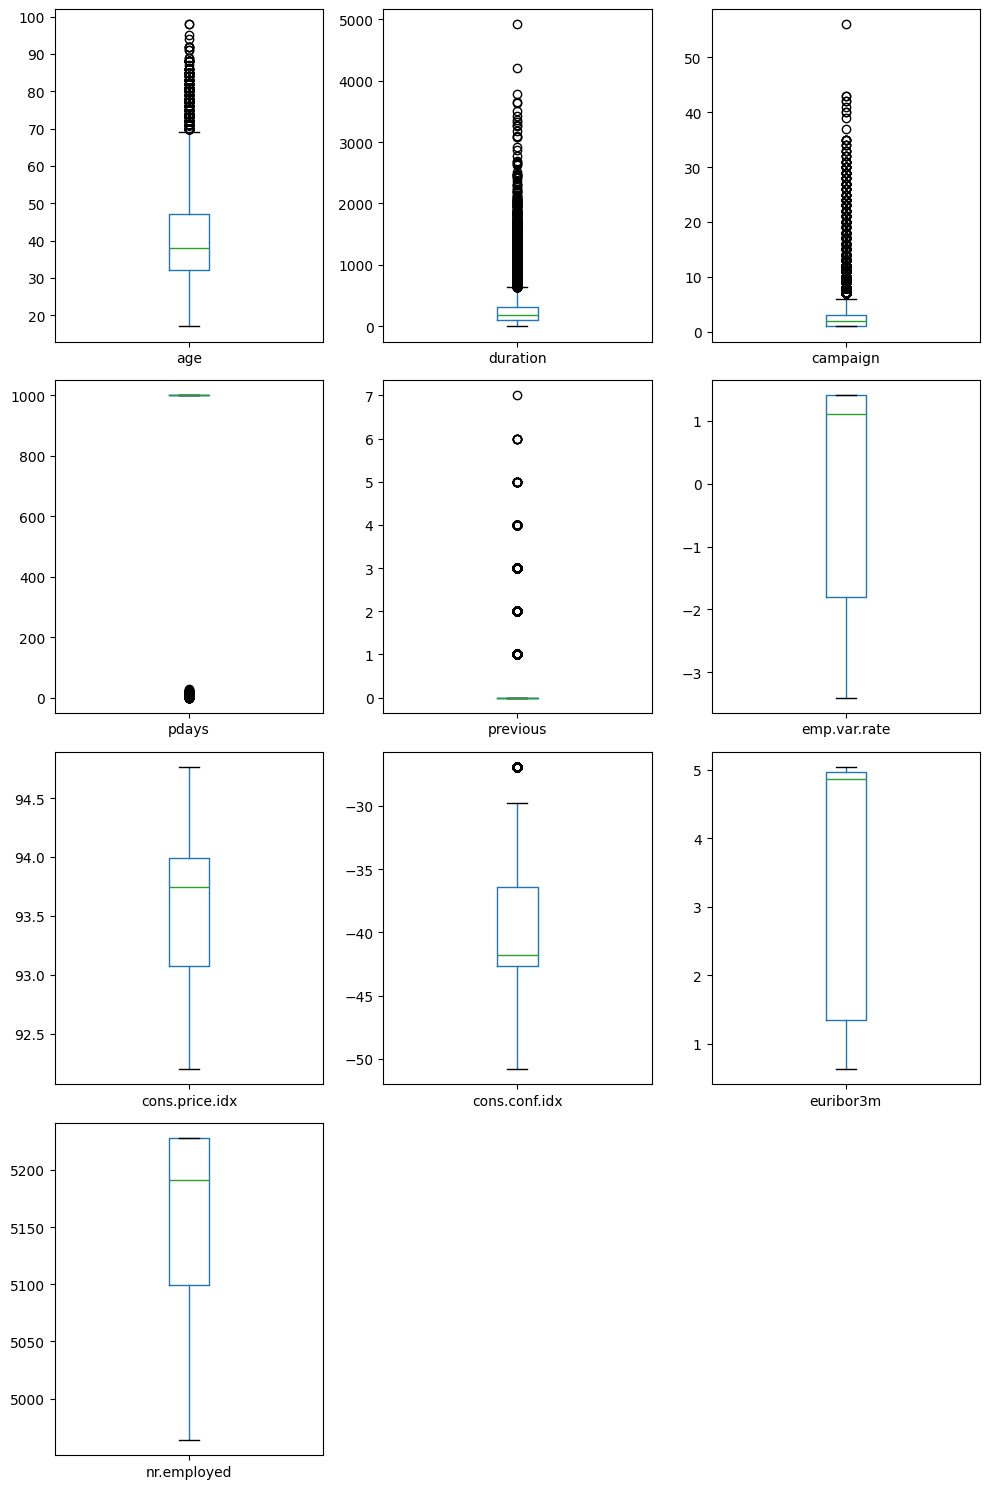

In [8]:
#outlier detection

plt.figure(figsize=(10,15))

for i, col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [9]:
df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [10]:
len(df[df['pdays'] == 999]) / len(df) * 100

96.32067223625413

In [11]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.38129007188653585

In [12]:
len(df[df['campaign'] > 7])

1777

#### Imputation using median:

From df.describe(), the median is the 50% value, which is 2

In [13]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


In [14]:
#replacing the values which are greater than the 95th percentile
df['campaign1'] = np.where(df['campaign'] > 7, 2, df['campaign'])
df[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7

#### Imputation using mean:

From df.describe(), the mean is 2.56

In [15]:
#replacing the values which are greater than the 95th percentile
df['campaign2'] = np.where(df['campaign'] > 7, 2.56, df['campaign'])
df[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statistics of the dataset after both median and mean imputation remains more or less the same

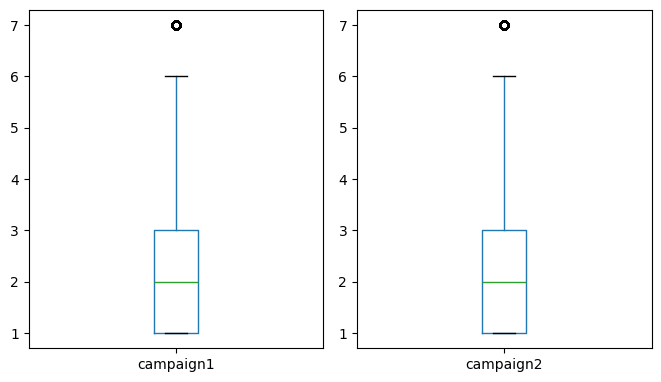

In [16]:
#outlier detection  after imputation
cols = ['campaign1','campaign2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [17]:

isolation = IsolationForest(contamination='auto',random_state=42)

isolation.fit(df[numeric_columns])

df['anamoly_scores'] = isolation.decision_function(df[numeric_columns])

df['anamoly'] = isolation.predict(df[numeric_columns])


df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2,anamoly_scores,anamoly
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.075461,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071189,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107095,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107145,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.141114,-1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,1.0,-0.114172,-1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,2,2.0,-0.113699,-1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.110737,-1


In [18]:
df.loc[: , ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','anamoly_scores','anamoly'] ]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,anamoly_scores,anamoly
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.075461,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.071189,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.107095,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.107145,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.071351,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.141114,-1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.114172,-1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.113699,-1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.110737,-1


In [19]:

def outlier_plot(data, outlier_method_name):
    print(f'Outlier Method: {outlier_method_name}')
    print(f"Number of anomalous values {len(data[data['anamoly'] == -1])}")
    print(f"Number of non anomalous values {len(data[data['anamoly'] == 1])}")
    print(f'Total Number of Values: {len(data)}')


outlier_plot(df,'Isolation Forest')

Outlier Method: Isolation Forest
Number of anomalous values 7739
Number of non anomalous values 33437
Total Number of Values: 41176


### Isolation Forest: 
The algorithm makes use of decision trees by averaging their predictions to assign a final anomaly score. This determines how much of an anomaly it is or how much of an anomaly it isn't.
In this case, an anomaly is an outlier.

In [20]:
#Defining the first and third quartile to find the IQR for the numeric columns.
#Defining the Lower bound and Upper bound using the formula.
#Returns the outliers within each column.
def identify_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < LB) | (df[column_name] > UB)]
    return outliers

# creating a dict to store the outliers
outliers_counts_iqr = {}



Total number of outliers in each column using IQR method:
age: 468
duration: 2963
campaign: 2406
pdays: 1515
previous: 5625
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 446
euribor3m: 0
nr.employed: 0


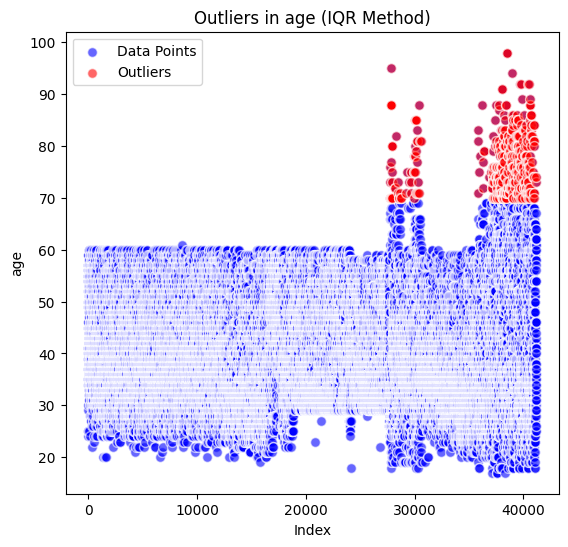

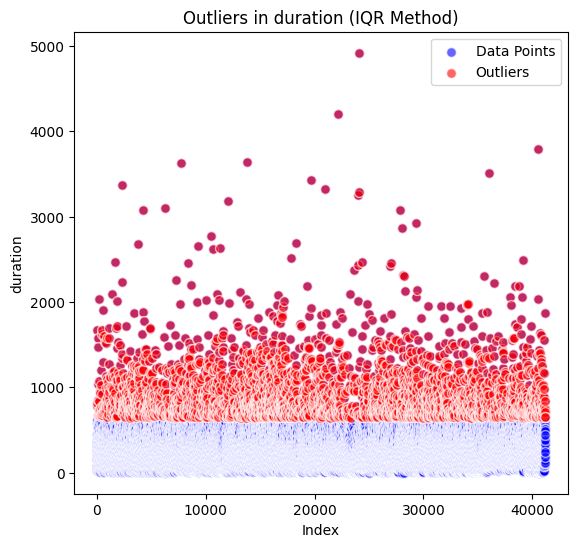

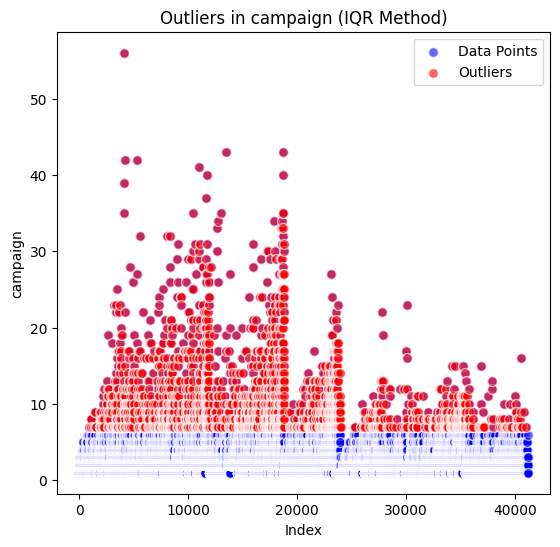

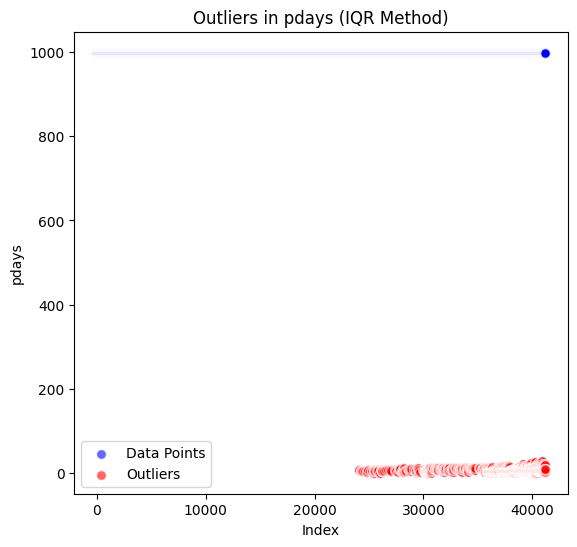

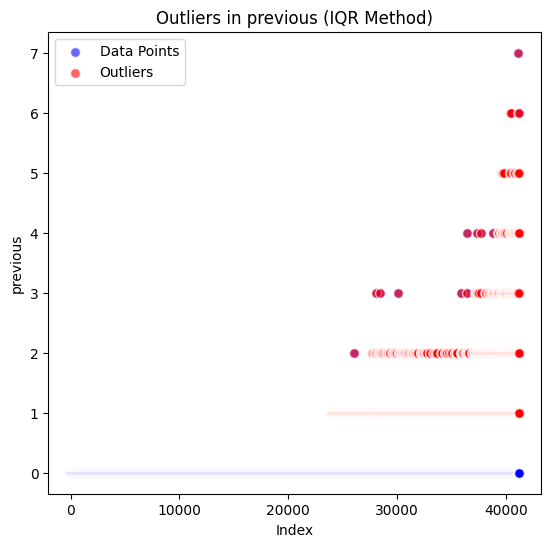

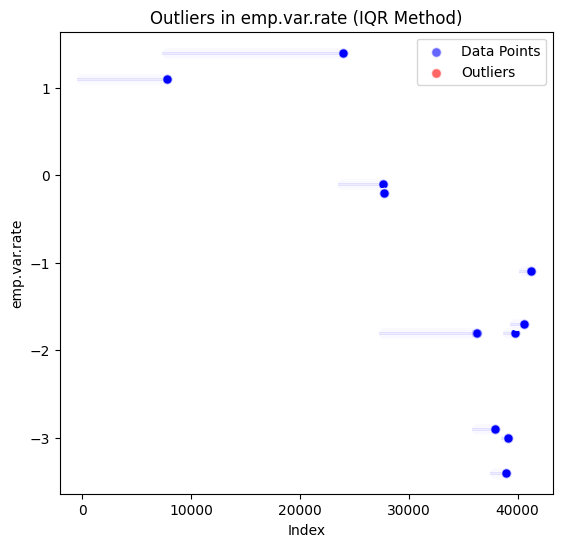

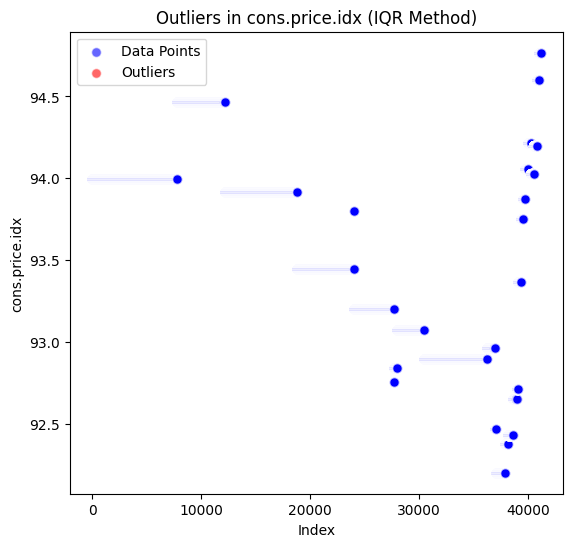

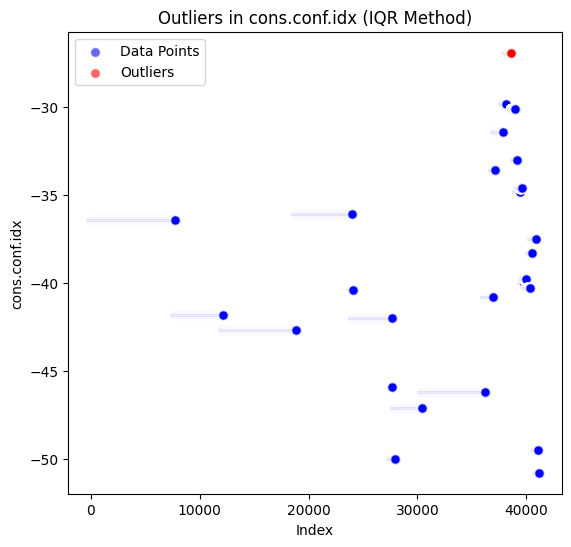

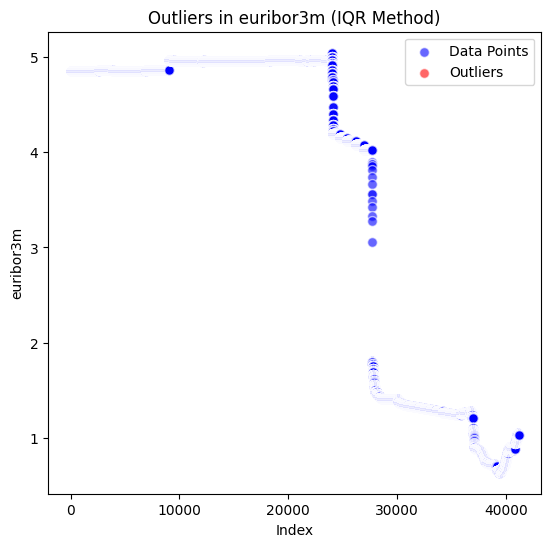

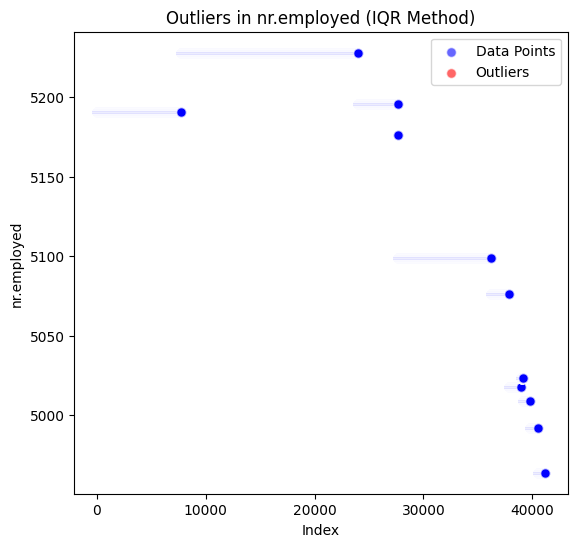

In [21]:
for column in numeric_columns:
    outliers_iqr = identify_outliers_iqr(df, column)
    outliers_counts_iqr[column] = len(outliers_iqr)
    
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df.index, df[column], color='blue', alpha=0.6, edgecolors='w', s=50, label='Data Points')
    plt.scatter(outliers_iqr.index, outliers_iqr[column], color='red', alpha=0.6, edgecolors='w', s=50, label='Outliers')
    plt.title(f'Outliers in {column} (IQR Method)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()



# Print the total number of outliers in each column
print("\nTotal number of outliers in each column using IQR method:")
for column, count in outliers_counts_iqr.items():
    print(f"{column}: {count}")



The IQR identify outliers by computing Interquartile range and data points that fall above and below 1.5 times the IQR from first and quartiles . Graphs are plotted with outliers highlighted in red for every numeric columns.For instance in "duration" column a large number of outliers are identified indicating significant spread of data.The scatter plot highlight how the IQR method captures extreme values effectively.

### Method 2 (Using Z-score)

The Z-score is calculayted from Z= σ/x−μ,σ :is the standard deviation and μ is the mean of the data points

In [22]:
threshold = 3
outliers_counts_Zscore = {}


Total number of outliers in each column:
age: 369
duration: 861
campaign: 869
pdays: 1515
previous: 1064
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0


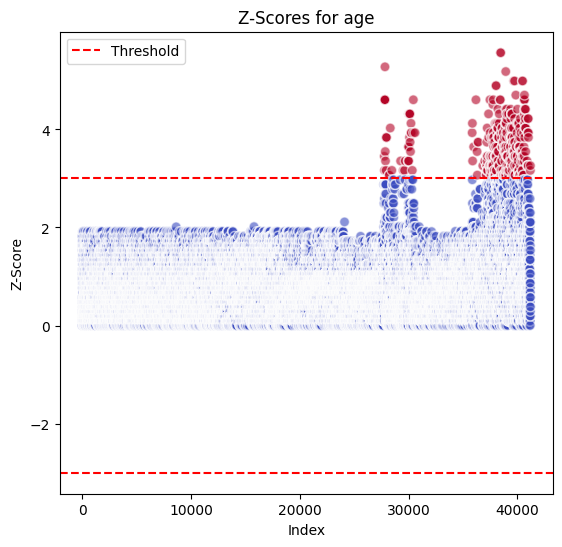

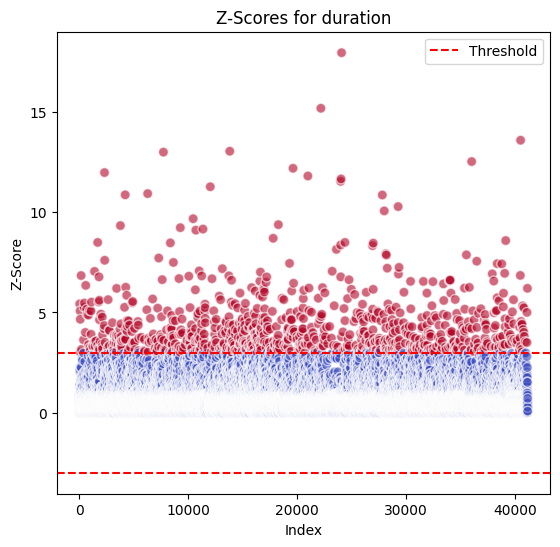

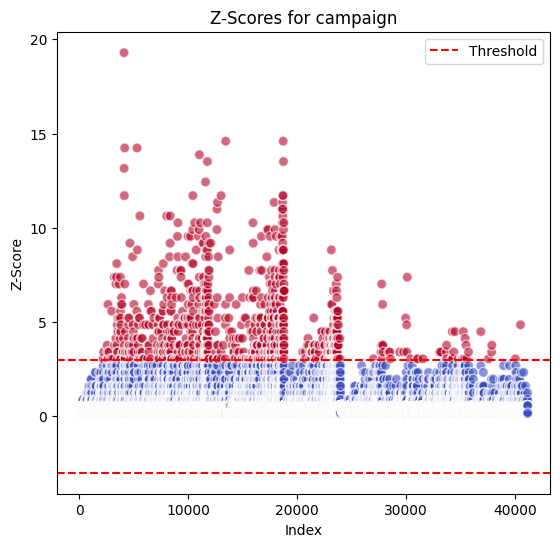

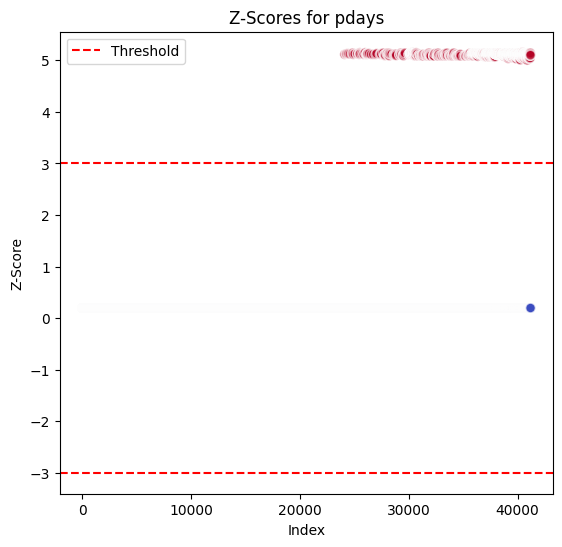

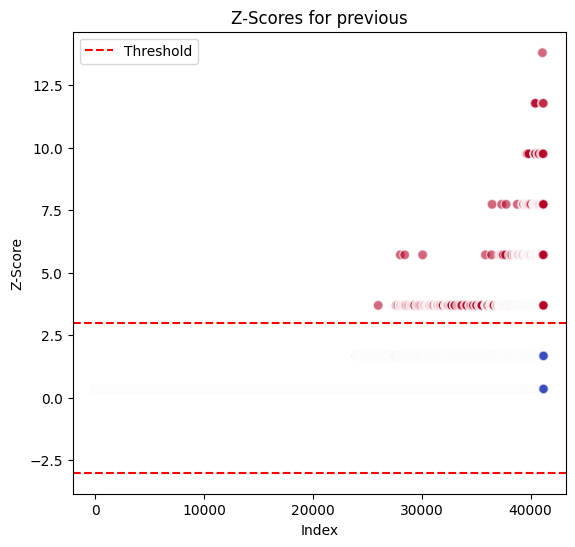

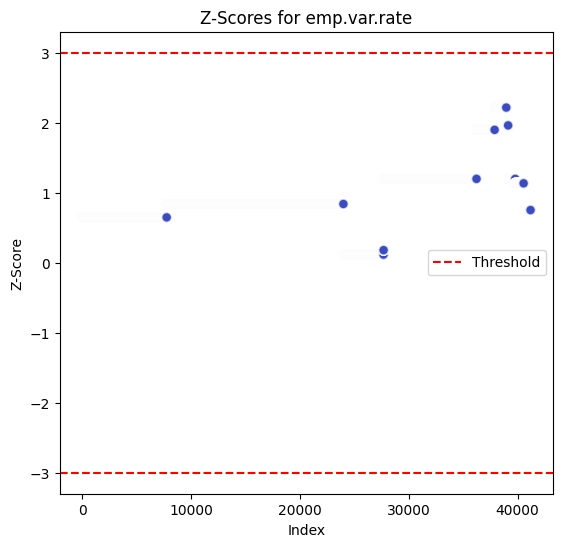

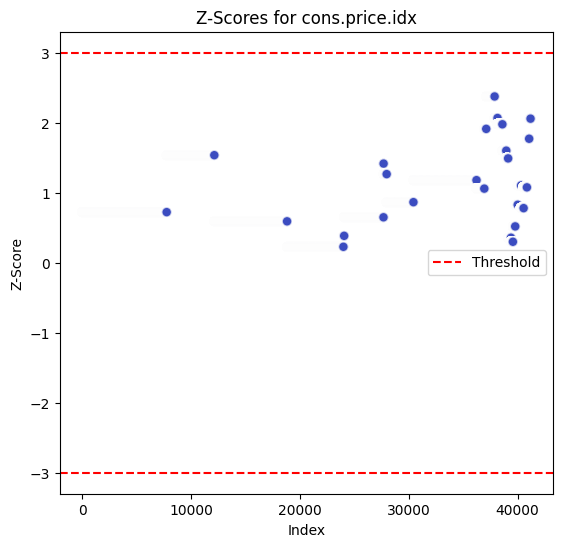

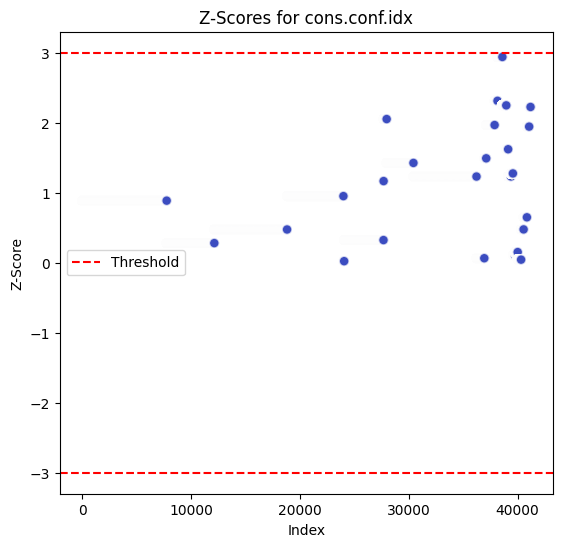

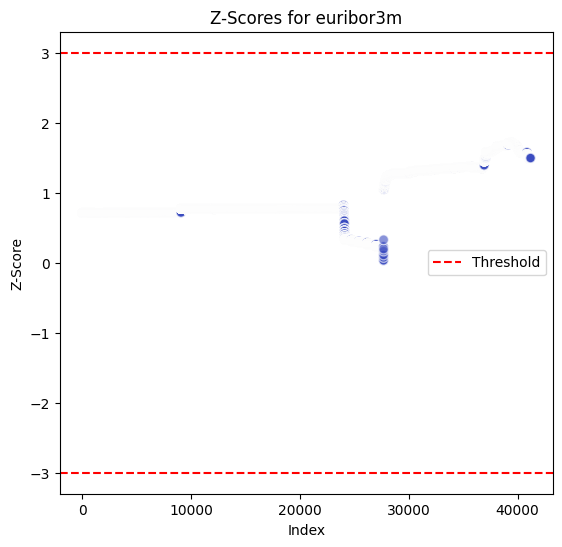

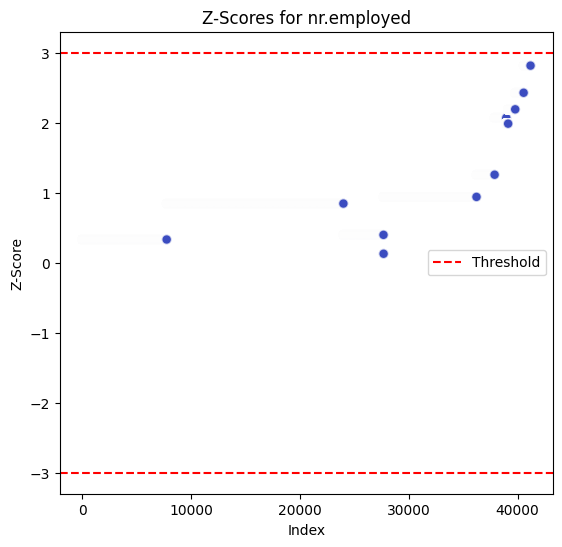

In [23]:
for column in numeric_columns:
    #Computing the Z_score for columns
    #Identifying the column indices where z score is above threshold and counting outliers
    column_z_scores = np.abs(stats.zscore(df[column]))
    outlier_indices = np.where(column_z_scores > threshold)[0]
    outliers_counts_Zscore[column] = len(outlier_indices)
    
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df[column].index, column_z_scores, c=(column_z_scores > threshold), cmap='coolwarm', alpha=0.6, edgecolors='w', s=50)
    plt.title(f'Z-Scores for {column}')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=-threshold, color='r', linestyle='--')
    plt.legend()



# Print the total number of outliers in each column
print("\nTotal number of outliers in each column:")
for column, count in outliers_counts_Zscore.items():
    print(f"{column}: {count}")


Z -score value tells how far and the direction in which the data point from mean . Here outliers are identified by defining a threshold of 3.As it give the best result on visualisation than lower thresholds.In the scatter plots , Z-scores for each numeric column with data points above the threshold highlighted as outliers.For instance, the 'duration' column shows fewer outliers compared to the IQR method, suggesting the Z-score method is more conservative.​

### Comparison of IQR and Z-score:

In terms of sensitvity, IQR is more robust to non - normal distribution and skewed data whereas, z-score assumes a normal distribution .This has effected its performance on skewed data columns.

IQR method has identified more outiliers in columns like "duration","campaign","previous" demonstrating its thoroughness in spotting anomalies. Z-score method found fewer outliers, which is appropriate for normally distributed data but not for data with a wide range of values.

The IQR approach is easy to interpret and explain because it is based on quartiles and data distribution.The Z-score method, which needs an awareness of standard deviations, may be less straightforward.

Based on the analysis IQR is more recommended over Z-score for outlier detection

In [24]:

# This is simple outlier handling to apply before log and cube transformation that will be adjusted when testing models
# more outlier detection methods and handling methods are described above


target_columns = ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m"]
# The variables pdays, previous, and nr.employed are better treated as categorical variables


def handle_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    return col.where((col >= LB) & (col <= UB), col.median())


df[target_columns] = df[target_columns].apply(handle_outliers)


In [25]:

categorical_df_encoded = pd.get_dummies(df[categorical_columns])
df_encoded = categorical_df_encoded

df_encoded[numeric_columns] = df[numeric_columns]

print("All features:")
print(df_encoded.columns)

print("Total number of features", len(df_encoded.columns))

All features:
Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pout

In [26]:

skewness = skew(df[target_columns])
print("Skew before log and cube root transformation:")
print(skewness)

i =0
for item in skewness:
    if abs(item)<1:
        print("passes", target_columns[i])
    else:
        print("fails", target_columns[i])
    i+=1

print()

positive_columns = []
mixed_columns = []
for col in target_columns:
    if ((df[col] >= 0).all()):
        positive_columns.append(col)
    else:
        mixed_columns.append(col)


numerical_df = df[positive_columns].map(lambda x: np.log(x+1))
numerical_df[mixed_columns] = df[mixed_columns]
numerical_df = numerical_df[target_columns]

numerical_df["campaign"] = numerical_df["campaign"].map(lambda x: math.pow(x, 1/3))


new_skewness = skew(numerical_df)

print("Skew after log and cube root transformation:")
print(new_skewness)

i =0
for item in new_skewness:
    if abs(item)<1:
        print("passes", target_columns[i])
    else:
        print("fails", target_columns[i])
    i+=1



Skew before log and cube root transformation:
[ 0.44388126  1.1005655   1.35217096 -0.72403421 -0.2308445   0.14190335
 -0.70916838]
passes age
fails duration
fails campaign
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m

Skew after log and cube root transformation:
[-0.00629189 -0.93846803  0.40662452 -0.72403421 -0.24112648  0.14190335
 -0.79070929]
passes age
passes duration
passes campaign
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m


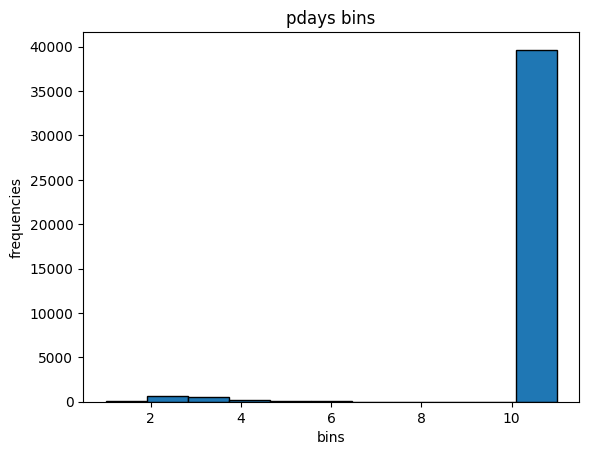

values for previous: [0, 1, 2, 3, 4, 5, 6, 7]
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]


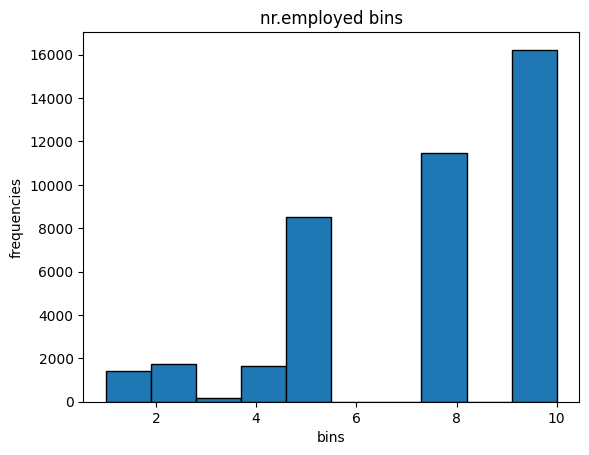

New categorical columns:
Index(['pdays_1', 'pdays_2', 'pdays_3', 'pdays_4', 'pdays_5', 'pdays_6',
       'pdays_7', 'pdays_8', 'pdays_9', 'pdays_10', 'pdays_11', 'previous',
       'nr.employed'],
      dtype='object')


In [27]:
numerical_df = df[numeric_columns]

# The pdays feature is extremely abnormal due to many data points with the value of 999
# It is binned in a special way to avoid many bins with zero frequencies
# First the data is filtered for values that are not 999
# Then normal binning commences
# Then the non filtered series is used to add the values of 999 with a corresponding bin value of 11
# This feature should be transformed into a one-hot encoded categorical variable since...
# the values between what the bins represent is non-linear since values with 999 is in the last bin.
filtered_pday = numerical_df["pdays"][numerical_df["pdays"]!=999]
bins = np.linspace(min(filtered_pday), max(filtered_pday), 10) 
binned = list(np.digitize(filtered_pday, bins))
old_nof_values = len(set(binned))
i =0
for item in list(numerical_df["pdays"]):
    if item == 999:
        binned.insert(i, np.int64(old_nof_values+1))
i+=1
plt.hist(binned, bins=len(bins)+1, edgecolor='black') 
plt.title("pdays bins")
plt.xlabel("bins")
plt.ylabel("frequencies")
plt.show()
new_categorical_vars = pd.get_dummies(pd.Categorical(binned), prefix='pdays')


# Convert previous to ordinal categorical variable due to extreme skewness
new_categorical_vars["previous"] = pd.Categorical(numerical_df["previous"], ordered=True)
print("values for previous:", new_categorical_vars["previous"].unique())

# convert nr.employed to ordinal categorical variable with binning
# This is due to skewness that could not be solved by log or cube transformations
bins = np.linspace(min(numerical_df["nr.employed"]), max(numerical_df["nr.employed"]), 10) 
binned = list(np.digitize(numerical_df["nr.employed"], bins))
plt.hist(binned, bins=len(bins), edgecolor='black') 
plt.title("nr.employed bins")
plt.xlabel("bins")
plt.ylabel("frequencies")
plt.show()
col_names = []
new_categorical_vars["nr.employed"] = pd.Categorical(numerical_df["nr.employed"], ordered=True)


print("New categorical columns:")
print(new_categorical_vars.columns)

When continuous variables are highly skewed and certain data transformation methods fall short, then it is often useful for model development to convert them into categorical variables using binning.

#### Comparing both of the graphs above:

The second graph (nr.employed) is more evenly distributed then the first (pdays) which does have its benefits for model building, but the data is still skewed.

On the other hand, for the first graph, based on previous data understanding, a value of 999 is highly indicative of the "no" class of the target variable(y) even without the bias of the data imbalance. 